In [1]:
# GridSearchCV to fine-tune a Decision Tree Classifier
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Visualization
# This function will help in visualization of our dataset.
def plot_dataset(X, y, axes):
    plt.figure(figsize=(10,6))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs",alpha = 0.5)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^",alpha = 0.2)
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)


In [3]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=10000, noise=0.4, random_state=21)

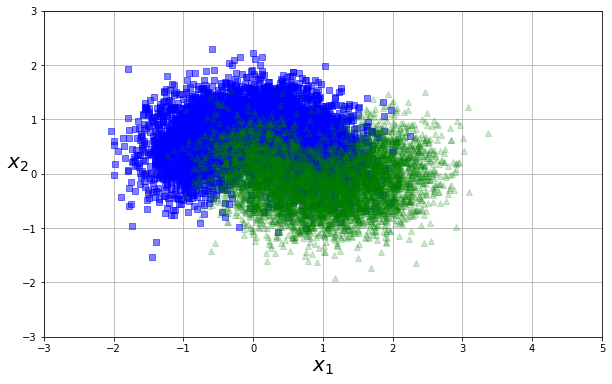

In [4]:
 plot_dataset(X, y, [-3, 5, -3, 3])

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [6]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()

In [7]:
from sklearn.model_selection import GridSearchCV

parameter = {
             'criterion' : ["gini", "entropy"],
             'max_leaf_nodes': list(range(2, 50)),
             'min_samples_split': [2, 3, 4]
            }


In [8]:
clf = GridSearchCV(tree_clf, parameter, cv = 5,scoring ="accuracy",return_train_score=True,n_jobs=-1)

In [9]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             return_train_score=True, scoring='accuracy')

In [10]:
# Getting the best parameter:
clf.best_params_

{'criterion': 'entropy', 'max_leaf_nodes': 29, 'min_samples_split': 2}

In [11]:
#look at the training results:
cvres = clf.cv_results_
for mean_score, params in zip(cvres["mean_train_score"], cvres["params"]):
    print(mean_score, params)


0.774 {'criterion': 'gini', 'max_leaf_nodes': 2, 'min_samples_split': 2}
0.774 {'criterion': 'gini', 'max_leaf_nodes': 2, 'min_samples_split': 3}
0.774 {'criterion': 'gini', 'max_leaf_nodes': 2, 'min_samples_split': 4}
0.821875 {'criterion': 'gini', 'max_leaf_nodes': 3, 'min_samples_split': 2}
0.821875 {'criterion': 'gini', 'max_leaf_nodes': 3, 'min_samples_split': 3}
0.821875 {'criterion': 'gini', 'max_leaf_nodes': 3, 'min_samples_split': 4}
0.8566874999999999 {'criterion': 'gini', 'max_leaf_nodes': 4, 'min_samples_split': 2}
0.8566874999999999 {'criterion': 'gini', 'max_leaf_nodes': 4, 'min_samples_split': 3}
0.8566874999999999 {'criterion': 'gini', 'max_leaf_nodes': 4, 'min_samples_split': 4}
0.8566874999999999 {'criterion': 'gini', 'max_leaf_nodes': 5, 'min_samples_split': 2}
0.8566874999999999 {'criterion': 'gini', 'max_leaf_nodes': 5, 'min_samples_split': 3}
0.8566874999999999 {'criterion': 'gini', 'max_leaf_nodes': 5, 'min_samples_split': 4}
0.8566874999999999 {'criterion': 'gin

In [12]:
#Getting the training score
clf.score(X_train, y_train)

0.867

In [13]:
from sklearn.metrics import confusion_matrix

pred = clf.predict(X_train)
confusion_matrix(y_train,pred)

array([[3547,  469],
       [ 595, 3389]], dtype=int64)

In [14]:
#from the confusion matrix let's get our precision and recall, which are better metrics.

from sklearn.metrics import precision_score, recall_score
pre = precision_score(y_train, pred)
re = recall_score(y_train, pred)
print(f"Precision: {pre} Recall:{re}")

Precision: 0.8784344219803006 Recall:0.8506526104417671


In [15]:
#we have a higher precision than recall but lets combine the two metrics into F1 score.

from sklearn.metrics import f1_score

f1_score(y_train, pred)

0.8643203264473348

In [16]:
#Getting the testing score

clf.score(X_test, y_test)


0.8625